In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [123]:
BASE_DIR=os.getcwd()
RELATIVE="/Historicaldata/ICICIBANK-2015-19.csv"
RELATIVE2="/Historicaldata/2018/ICICIBANK-2018.csv"
RELATIVE3="/Historicaldata/BITFINEX-BTCEUR.csv"
DIR=BASE_DIR + RELATIVE3

In [130]:
df=pd.read_csv(DIR)
df.rename(columns={'High':'Open'},inplace=True)

In [131]:
df.head(10)

,Date,Open,Low,Mid,Last,Bid,Ask,Volume
0,2019-05-24,7285.400000,6961.320263,7185.55,7185.7,7185.3,7185.8,911.112468
1,2019-05-23,7115.900000,6676.771740,7045.95,7045.9,7045.9,7046.0,596.415905
2,2019-05-22,7208.300000,6724.004278,6929.70,6929.7,6929.6,6929.8,673.027830
3,2019-05-21,7250.300000,7010.900000,7127.85,7134.7,7127.7,7128.0,447.824514
4,2019-05-20,7407.600000,6807.900000,7100.85,7105.1,7100.8,7100.9,874.053986
5,2019-05-19,7361.400000,6481.800000,7318.75,7310.4,7318.7,7318.8,983.012534
6,2019-05-18,6731.300000,6455.192028,6531.00,6544.1,6530.9,6531.1,870.741997
7,2019-05-17,7075.604347,6262.400000,6540.05,6540.1,6540.0,6540.1,1828.086307
8,2019-05-16,7449.100000,6890.900000,7045.85,7048.0,7045.2,7046.5,1370.944220
9,2019-05-15,7320.800000,6986.500000,7236.45,7238.4,7236.4,7236.5,1463.591290


In [132]:
df_open=df.loc[:,["Open"]]
df_open.shape

(536, 1)

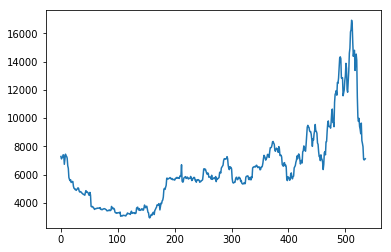

In [133]:
plt.plot(df_open["Open"])

In [134]:
def SMA(df,x):
    if not (len(df.columns)==1):
        print("Check the dimension")
        return
    zero_data=np.zeros(shape=(df.size,1))
    df_sma=pd.DataFrame(zero_data,columns=df.columns)

    for i in range(0,df_sma.size):
        if x==1:
            ma=df.iloc[i,0]
        if i<x-1:
            ma=df.iloc[:i,0].mean()
            df_sma.iloc[i,0]=ma
        else:    
            df_sma.iloc[i,0]=ma
            try:
                ma=ma -df.iloc[i-x+1,0]/x+df.iloc[i+1,0]/x
            except:
                pass

    return df_sma
            
    
    

In [135]:
def EMA(df,x,s=2):
    if not (len(df.columns)==1):
        print("Check the dimension")
        return
    zero_data=np.zeros(shape=(df.size,1))
    df_ema=pd.DataFrame(zero_data,columns=df.columns)

    for i in range(0,df_ema.size):
        if x==1:
            ema=df.iloc[i,0]
        elif i<x-1:
            ema=df.iloc[:i,0].mean()
            df_ema.iloc[i,0]=ema
        else:    
            ema=df.iloc[i,0]*s/(x+1) + df_ema.iloc[i-1,0]*(1-s/(x+1))
            df_ema.iloc[i,0]=ema

    return df_ema
            

In [136]:
df_sma=SMA(df_open,13)
df_ema=EMA(df_open,13,2)

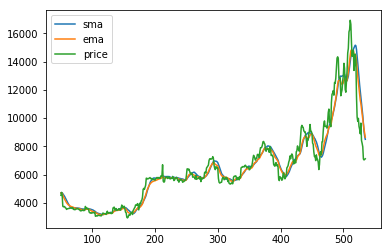

In [137]:
plt.plot(df_sma.loc[50:,["Open"]],label="sma")
plt.plot(df_ema.loc[50:,["Open"]],label="ema")
plt.plot(df.loc[50:,["Open"]],label="price")

plt.legend()


In [138]:
df_sma.shape

(536, 1)

In [147]:
def profit_sma(start,end,intial=100000):
    crossing=[]
    profit=0
    i=start

    while i<end:
        if(df_sma.iloc[i,0]<df_open.iloc[i,0]):
    #         BuyIng Point
            t0=i
            shares=initial/df_open.iloc[i,0]
            while(df_sma.iloc[i,0]<df_open.iloc[i,0] and i<end):
                i=i+1
            profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
            crossing.append([t0,i])
            t0=i
        i=i+1

    if(df_open.iloc[i,0]>df_open.iloc[t0,0]):
        profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
    print(len(crossing))

    print("Profit Earned in sma: %s (%s%%)" % (profit,profit/initial*100))       

In [148]:
def profit_ema(start,end,intial=100000):
    crossing=[]
    profit=0
    i=start

    while i<end:
        if(df_ema.iloc[i,0]<df_open.iloc[i,0]):
    #         BuyIng Point
            t0=i
            shares=initial/df_open.iloc[i,0]
            while(df_ema.iloc[i,0]<df_open.iloc[i,0] and i<end):
                i=i+1
            profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
            crossing.append([t0,i])
            t0=i
        i=i+1

    if(df_open.iloc[i,0]>df_open.iloc[t0,0]):
        profit+=(df_open.iloc[i,0]-df_open.iloc[t0,0])*shares
        print(len(crossing))

        print("Profit Earned in ema: %s (%s%%)" % (profit,profit/initial*100))          

In [149]:
profit_ema(50,500)

33
Profit Earned in ema: 85887.9226413956 (85.8879226413956%)


In [150]:
profit_sma(50,500)

30
Profit Earned in sma: 93567.94644473329 (93.56794644473328%)
